In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(1500/necoc)
generations

6

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

112


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1127
number of class2:490

 ****** Running generation 0 ****** 

Population's average fitness: 0.44996 stdev: 0.14019
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 113
Average adjusted fitness: 0.189
Mean genetic distance 2.949, standard deviation 0.452
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.809 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56964 stdev: 0.13925
Best fitness: 0.78417 - size: (2, 14) - species 13 - id 361
Average adjusted fitness: 0.314
Mean genetic distance 3.021, standard deviation 0.449
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.829 sec (5.819 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59619 stdev: 0.13497
Best fitness: 0.78417 - size: (2, 14) - species 13 - id 361
Average adjusted fitness: 0.376
Mean genetic distance 2.990, standard deviation 0.470
Population of 198 members in 35 species
Total extinc

Population's average fitness: 0.49762 stdev: 0.07820
Best fitness: 0.71490 - size: (2, 13) - species 3 - id 60
Average adjusted fitness: 0.251
Mean genetic distance 2.945, standard deviation 0.470
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.258 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53872 stdev: 0.08330
Best fitness: 0.79530 - size: (3, 15) - species 2 - id 247
Average adjusted fitness: 0.258
Mean genetic distance 3.015, standard deviation 0.481
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.648 sec (5.453 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54941 stdev: 0.08700
Best fitness: 0.79530 - size: (3, 15) - species 7 - id 247
Average adjusted fitness: 0.261
Mean genetic distance 3.040, standard deviation 0.486
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.878 sec (5.595 average)

 ****** Running generation 3 ***

Generation time: 6.292 sec (5.876 average)
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.48161 stdev: 0.08573
Best fitness: 0.66172 - size: (2, 13) - species 6 - id 16
Average adjusted fitness: 0.165
Mean genetic distance 2.935, standard deviation 0.472
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.346 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52947 stdev: 0.08641
Best fitness: 0.68522 - size: (2, 14) - species 2 - id 208
Average adjusted fitness: 0.168
Mean genetic distance 3.059, standard deviation 0.478
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 5.665 sec (5.505 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54065 stdev: 0.08947
Best fitness: 0.68522 - size: (2, 14) - species 7 - id 208
Average adjusted fitness: 0.233
Mean genetic distance 3.044, standard deviation 0.461
Population of

Mean genetic distance 3.112, standard deviation 0.474
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.520 sec (6.041 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.50238 stdev: 0.06983
Best fitness: 0.72480 - size: (2, 13) - species 1 - id 99
Average adjusted fitness: 0.188
Mean genetic distance 2.949, standard deviation 0.486
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.296 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53874 stdev: 0.07525
Best fitness: 0.72480 - size: (2, 13) - species 8 - id 99
Average adjusted fitness: 0.229
Mean genetic distance 3.055, standard deviation 0.486
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.742 sec (5.519 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54879 stdev: 0.07458
Best fitness: 0.72480 - size: (2, 13) - spec


 ****** Running generation 0 ****** 

Population's average fitness: 0.41499 stdev: 0.28432
Best fitness: 0.89981 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.263
Mean genetic distance 2.864, standard deviation 0.494
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.344 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58048 stdev: 0.27589
Best fitness: 0.90538 - size: (3, 14) - species 2 - id 252
Average adjusted fitness: 0.474
Mean genetic distance 2.967, standard deviation 0.471
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.710 sec (5.527 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69162 stdev: 0.24437
Best fitness: 0.90538 - size: (3, 14) - species 24 - id 252
Average adjusted fitness: 0.542
Mean genetic distance 3.022, standard deviation 0.470
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.963 sec (5.672 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.44604 stdev: 0.14072
Best fitness: 0.73717 - size: (2, 13) - species 9 - id 122
Average adjusted fitness: 0.184
Mean genetic distance 2.921, standard deviation 0.494
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.183 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54811 stdev: 0.14596
Best fitness: 0.75758 - size: (3, 14) - species 19 - id 363
Average adjusted fitness: 0.262
Mean genetic distance 2.976, standard deviation 0.509
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.498 sec (5.341 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58150 stdev: 0.14287
Best fitness: 0.75758 - size: (3, 14) - species 19 - id 363
Average adjusted fitness: 0.332
Mean genetic distance 2.995, standard deviation 0.528
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.921 sec (5.534 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47016 stdev: 0.15221
Best fitness: 0.77056 - size: (2, 13) - species 1 - id 163
Average adjusted fitness: 0.211
Mean genetic distance 2.879, standard deviation 0.434
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.264 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54179 stdev: 0.15774
Best fitness: 0.77056 - size: (2, 13) - species 3 - id 163
Average adjusted fitness: 0.297
Mean genetic distance 2.933, standard deviation 0.422
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.721 sec (5.493 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57331 stdev: 0.15071
Best fitness: 0.77056 - size: (2, 13) - species 24 - id 163
Average adjusted fitness: 0.323
Mean genetic distance 2.936, standard deviation 0.464
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.859 sec (5.615 a

Generation time: 6.502 sec (6.050 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.48505 stdev: 0.09650
Best fitness: 0.71861 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.190
Mean genetic distance 2.918, standard deviation 0.489
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.232 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53206 stdev: 0.09965
Best fitness: 0.71861 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.207
Mean genetic distance 3.014, standard deviation 0.494
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.659 sec (5.446 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55358 stdev: 0.09650
Best fitness: 0.71861 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.224
Mean genetic distance 3.039, standard deviation 0.510
Population of 2

Population's average fitness: 0.49755 stdev: 0.05748
Best fitness: 0.65863 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.166
Mean genetic distance 2.923, standard deviation 0.492
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.328 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52384 stdev: 0.05814
Best fitness: 0.68646 - size: (3, 14) - species 16 - id 280
Average adjusted fitness: 0.227
Mean genetic distance 3.009, standard deviation 0.505
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 5.610 sec (5.469 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54292 stdev: 0.06680
Best fitness: 0.69511 - size: (4, 16) - species 16 - id 540
Average adjusted fitness: 0.158
Mean genetic distance 3.055, standard deviation 0.489
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.969 sec (5.636 average)

 ****** Running generation 3 *

Population's average fitness: 0.53907 stdev: 0.15240
Best fitness: 0.83426 - size: (2, 13) - species 4 - id 181
Average adjusted fitness: 0.320
Mean genetic distance 2.816, standard deviation 0.440
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.262 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61229 stdev: 0.14795
Best fitness: 0.83426 - size: (2, 13) - species 2 - id 181
Average adjusted fitness: 0.351
Mean genetic distance 2.954, standard deviation 0.464
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.782 sec (8.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63782 stdev: 0.14080
Best fitness: 0.84354 - size: (2, 14) - species 22 - id 454
Average adjusted fitness: 0.396
Mean genetic distance 3.014, standard deviation 0.493
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.687 sec (8.577 average)

 ****** Running generation 3 *

Population's average fitness: 0.47255 stdev: 0.08835
Best fitness: 0.67842 - size: (2, 13) - species 5 - id 85
Average adjusted fitness: 0.193
Mean genetic distance 2.864, standard deviation 0.466
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.575 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53168 stdev: 0.08682
Best fitness: 0.73531 - size: (3, 14) - species 8 - id 312
Average adjusted fitness: 0.170
Mean genetic distance 2.920, standard deviation 0.452
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 5.872 sec (5.723 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56214 stdev: 0.09539
Best fitness: 0.80458 - size: (4, 16) - species 22 - id 545
Average adjusted fitness: 0.293
Mean genetic distance 2.934, standard deviation 0.455
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.381 sec (5.943 average)

 ****** Running generation 3 **

number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48016 stdev: 0.09406
Best fitness: 0.67965 - size: (2, 13) - species 6 - id 187
Average adjusted fitness: 0.194
Mean genetic distance 2.897, standard deviation 0.452
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.614 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55248 stdev: 0.08976
Best fitness: 0.72294 - size: (3, 14) - species 4 - id 363
Average adjusted fitness: 0.226
Mean genetic distance 2.996, standard deviation 0.466
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.907 sec (5.760 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56033 stdev: 0.09304
Best fitness: 0.76190 - size: (2, 12) - species 15 - id 419
Average adjusted fitness: 0.296
Mean genetic distance 3.043, standard deviation 0.454
Population of 200 members in 34 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.44847 stdev: 0.20741
Best fitness: 0.81076 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.284
Mean genetic distance 2.945, standard deviation 0.490
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.854 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60615 stdev: 0.19967
Best fitness: 0.81076 - size: (2, 13) - species 7 - id 169
Average adjusted fitness: 0.424
Mean genetic distance 3.024, standard deviation 0.480
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.318 sec (7.586 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66881 stdev: 0.17074
Best fitness: 0.81447 - size: (3, 15) - species 7 - id 516
Average adjusted fitness: 0.457
Mean genetic distance 3.024, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.165 sec (7.779 average)

 ****** Running generation 3 **

Generation time: 6.754 sec (7.245 average)
number of class1:1126
number of class2:491

 ****** Running generation 0 ****** 

Population's average fitness: 0.46968 stdev: 0.13975
Best fitness: 0.74830 - size: (2, 13) - species 2 - id 68
Average adjusted fitness: 0.224
Mean genetic distance 2.889, standard deviation 0.485
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.720 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57364 stdev: 0.12888
Best fitness: 0.74830 - size: (2, 13) - species 7 - id 68
Average adjusted fitness: 0.298
Mean genetic distance 2.986, standard deviation 0.485
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.662 sec (6.691 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60868 stdev: 0.12672
Best fitness: 0.74830 - size: (2, 13) - species 7 - id 68
Average adjusted fitness: 0.302
Mean genetic distance 3.027, standard deviation 0.514
Population of 

Population's average fitness: 0.51366 stdev: 0.09206
Best fitness: 0.67285 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.222
Mean genetic distance 2.963, standard deviation 0.477
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.718 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56108 stdev: 0.09211
Best fitness: 0.71305 - size: (2, 13) - species 19 - id 302
Average adjusted fitness: 0.263
Mean genetic distance 3.057, standard deviation 0.466
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.175 sec (5.946 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57978 stdev: 0.08942
Best fitness: 0.72975 - size: (4, 16) - species 11 - id 414
Average adjusted fitness: 0.278
Mean genetic distance 3.080, standard deviation 0.475
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 6.507 sec (6.133 average)

 ****** Running generation 3 **

Population's average fitness: 0.50877 stdev: 0.05895
Best fitness: 0.66914 - size: (2, 13) - species 6 - id 47
Average adjusted fitness: 0.162
Mean genetic distance 2.933, standard deviation 0.468
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.573 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52607 stdev: 0.06622
Best fitness: 0.72542 - size: (3, 15) - species 6 - id 342
Average adjusted fitness: 0.180
Mean genetic distance 3.007, standard deviation 0.470
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 6.049 sec (5.811 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54676 stdev: 0.07692
Best fitness: 0.74026 - size: (4, 18) - species 6 - id 524
Average adjusted fitness: 0.244
Mean genetic distance 3.013, standard deviation 0.461
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.171 sec (5.931 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50348 stdev: 0.06087
Best fitness: 0.66419 - size: (2, 13) - species 1 - id 179
Average adjusted fitness: 0.181
Mean genetic distance 2.737, standard deviation 0.416
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 5.608 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52504 stdev: 0.06330
Best fitness: 0.68398 - size: (3, 15) - species 4 - id 289
Average adjusted fitness: 0.186
Mean genetic distance 2.857, standard deviation 0.446
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 6.113 sec (5.861 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54619 stdev: 0.06583
Best fitness: 0.71676 - size: (2, 13) - species 12 - id 401
Average adjusted fitness: 0.220
Mean genetic distance 2.908, standard deviation 0.477
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 6.322 sec (6.014 average)

 ****** Running generation 3 *

number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.47705 stdev: 0.08572
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.183
Mean genetic distance 2.900, standard deviation 0.523
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.376 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52518 stdev: 0.07990
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.172
Mean genetic distance 2.978, standard deviation 0.497
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 6.239 sec (5.807 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55059 stdev: 0.08636
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.229
Mean genetic distance 3.069, standard deviation 0.489
Population of 203 members in 34 species
Total extinctions:

Population's average fitness: 0.46808 stdev: 0.15213
Best fitness: 0.80891 - size: (2, 13) - species 4 - id 82
Average adjusted fitness: 0.318
Mean genetic distance 2.874, standard deviation 0.476
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.576 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58022 stdev: 0.14650
Best fitness: 0.85529 - size: (3, 15) - species 14 - id 314
Average adjusted fitness: 0.400
Mean genetic distance 2.991, standard deviation 0.503
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 6.195 sec (5.885 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61738 stdev: 0.13462
Best fitness: 0.86456 - size: (4, 17) - species 12 - id 474
Average adjusted fitness: 0.312
Mean genetic distance 3.029, standard deviation 0.526
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.237 sec (6.003 average)

 ****** Running generation 3 *

Generation time: 6.864 sec (6.506 average)
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.49080 stdev: 0.07879
Best fitness: 0.71861 - size: (2, 13) - species 2 - id 139
Average adjusted fitness: 0.197
Mean genetic distance 2.835, standard deviation 0.428
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.493 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54300 stdev: 0.08023
Best fitness: 0.76005 - size: (3, 15) - species 5 - id 218
Average adjusted fitness: 0.261
Mean genetic distance 2.890, standard deviation 0.427
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.020 sec (5.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55999 stdev: 0.08347
Best fitness: 0.76005 - size: (3, 15) - species 5 - id 218
Average adjusted fitness: 0.236
Mean genetic distance 2.903, standard deviation 0.464
Population o

Population's average fitness: 0.50045 stdev: 0.05806
Best fitness: 0.68275 - size: (2, 13) - species 1 - id 114
Average adjusted fitness: 0.165
Mean genetic distance 2.921, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.409 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52667 stdev: 0.05533
Best fitness: 0.72851 - size: (3, 15) - species 4 - id 385
Average adjusted fitness: 0.173
Mean genetic distance 2.994, standard deviation 0.466
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.944 sec (5.677 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53741 stdev: 0.06240
Best fitness: 0.73779 - size: (4, 17) - species 32 - id 514
Average adjusted fitness: 0.166
Mean genetic distance 2.973, standard deviation 0.483
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.301 sec (5.885 average)

 ****** Running generation 3 *

Population's average fitness: 0.48318 stdev: 0.07859
Best fitness: 0.65059 - size: (2, 13) - species 1 - id 107
Average adjusted fitness: 0.155
Mean genetic distance 2.762, standard deviation 0.454
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 5.232 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53601 stdev: 0.07858
Best fitness: 0.70130 - size: (3, 15) - species 2 - id 332
Average adjusted fitness: 0.216
Mean genetic distance 2.923, standard deviation 0.462
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.642 sec (5.437 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55672 stdev: 0.08037
Best fitness: 0.71429 - size: (4, 17) - species 2 - id 539
Average adjusted fitness: 0.205
Mean genetic distance 3.024, standard deviation 0.476
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 5.937 sec (5.604 average)

 ****** Running generation 3 **

Population's average fitness: 0.52497 stdev: 0.10126
Best fitness: 0.73222 - size: (2, 13) - species 3 - id 161
Average adjusted fitness: 0.319
Mean genetic distance 2.872, standard deviation 0.468
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.385 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57114 stdev: 0.09880
Best fitness: 0.73222 - size: (2, 13) - species 3 - id 161
Average adjusted fitness: 0.327
Mean genetic distance 2.958, standard deviation 0.487
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.766 sec (5.576 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59415 stdev: 0.08683
Best fitness: 0.77675 - size: (3, 16) - species 5 - id 508
Average adjusted fitness: 0.273
Mean genetic distance 2.953, standard deviation 0.470
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.090 sec (5.747 average)

 ****** Running generation 3 **

Population's average fitness: 0.50715 stdev: 0.08195
Best fitness: 0.66605 - size: (2, 13) - species 3 - id 51
Average adjusted fitness: 0.196
Mean genetic distance 2.822, standard deviation 0.448
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.596 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56153 stdev: 0.07683
Best fitness: 0.68398 - size: (2, 13) - species 8 - id 252
Average adjusted fitness: 0.229
Mean genetic distance 2.922, standard deviation 0.460
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.094 sec (5.845 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56800 stdev: 0.07519
Best fitness: 0.71429 - size: (4, 16) - species 19 - id 552
Average adjusted fitness: 0.196
Mean genetic distance 2.971, standard deviation 0.465
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 6.289 sec (5.993 average)

 ****** Running generation 3 **

Population's average fitness: 0.47985 stdev: 0.08032
Best fitness: 0.69511 - size: (2, 13) - species 3 - id 31
Average adjusted fitness: 0.152
Mean genetic distance 2.868, standard deviation 0.462
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.684 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53953 stdev: 0.08755
Best fitness: 0.75325 - size: (3, 15) - species 10 - id 360
Average adjusted fitness: 0.168
Mean genetic distance 3.023, standard deviation 0.468
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.968 sec (5.826 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56121 stdev: 0.08936
Best fitness: 0.75448 - size: (4, 17) - species 10 - id 522
Average adjusted fitness: 0.330
Mean genetic distance 3.059, standard deviation 0.468
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.339 sec (5.997 average)

 ****** Running generation 3 *

Population's average fitness: 0.51756 stdev: 0.09592
Best fitness: 0.70625 - size: (2, 13) - species 1 - id 95
Average adjusted fitness: 0.236
Mean genetic distance 2.898, standard deviation 0.451
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.801 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57716 stdev: 0.08079
Best fitness: 0.74026 - size: (3, 15) - species 4 - id 370
Average adjusted fitness: 0.270
Mean genetic distance 2.914, standard deviation 0.472
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.093 sec (5.947 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58888 stdev: 0.08505
Best fitness: 0.74026 - size: (3, 15) - species 17 - id 370
Average adjusted fitness: 0.308
Mean genetic distance 2.992, standard deviation 0.505
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.417 sec (6.104 average)

 ****** Running generation 3 **

Population's average fitness: 0.51908 stdev: 0.09982
Best fitness: 0.74335 - size: (2, 13) - species 1 - id 43
Average adjusted fitness: 0.284
Mean genetic distance 2.863, standard deviation 0.489
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.694 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56091 stdev: 0.09590
Best fitness: 0.74830 - size: (3, 15) - species 8 - id 368
Average adjusted fitness: 0.322
Mean genetic distance 3.017, standard deviation 0.475
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.063 sec (5.878 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57258 stdev: 0.09846
Best fitness: 0.77427 - size: (3, 15) - species 21 - id 405
Average adjusted fitness: 0.246
Mean genetic distance 3.059, standard deviation 0.480
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.415 sec (6.057 average)

 ****** Running generation 3 **

Population's average fitness: 0.49721 stdev: 0.06647
Best fitness: 0.70006 - size: (2, 13) - species 7 - id 136
Average adjusted fitness: 0.237
Mean genetic distance 2.940, standard deviation 0.488
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.921 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52787 stdev: 0.07129
Best fitness: 0.70563 - size: (3, 15) - species 2 - id 279
Average adjusted fitness: 0.300
Mean genetic distance 3.015, standard deviation 0.518
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.164 sec (6.043 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54508 stdev: 0.07456
Best fitness: 0.71738 - size: (4, 17) - species 15 - id 525
Average adjusted fitness: 0.242
Mean genetic distance 3.036, standard deviation 0.506
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.413 sec (6.166 average)

 ****** Running generation 3 *

Population's average fitness: 0.47480 stdev: 0.08293
Best fitness: 0.70130 - size: (2, 13) - species 1 - id 174
Average adjusted fitness: 0.171
Mean genetic distance 2.874, standard deviation 0.438
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.292 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52886 stdev: 0.08695
Best fitness: 0.70130 - size: (2, 13) - species 3 - id 174
Average adjusted fitness: 0.174
Mean genetic distance 2.924, standard deviation 0.468
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.750 sec (6.521 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54557 stdev: 0.08619
Best fitness: 0.70130 - size: (2, 13) - species 25 - id 174
Average adjusted fitness: 0.189
Mean genetic distance 2.893, standard deviation 0.468
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.368 sec (6.803 average)

 ****** Running generation 3 *

Population's average fitness: 0.52297 stdev: 0.09151
Best fitness: 0.71552 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.275
Mean genetic distance 2.901, standard deviation 0.463
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.602 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55712 stdev: 0.09326
Best fitness: 0.76129 - size: (3, 15) - species 14 - id 279
Average adjusted fitness: 0.193
Mean genetic distance 2.957, standard deviation 0.473
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.180 sec (6.391 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57823 stdev: 0.09472
Best fitness: 0.76129 - size: (3, 15) - species 14 - id 279
Average adjusted fitness: 0.243
Mean genetic distance 2.991, standard deviation 0.478
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 7.568 sec (6.784 average)

 ****** Running generation 3 

Population's average fitness: 0.44438 stdev: 0.20875
Best fitness: 0.80643 - size: (2, 13) - species 7 - id 168
Average adjusted fitness: 0.282
Mean genetic distance 2.919, standard deviation 0.492
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.170 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58612 stdev: 0.21203
Best fitness: 0.82622 - size: (3, 15) - species 5 - id 227
Average adjusted fitness: 0.385
Mean genetic distance 3.034, standard deviation 0.493
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.083 sec (6.126 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61850 stdev: 0.21121
Best fitness: 0.82622 - size: (3, 15) - species 5 - id 227
Average adjusted fitness: 0.397
Mean genetic distance 3.016, standard deviation 0.491
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.689 sec (6.314 average)

 ****** Running generation 3 **

Population's average fitness: 0.52535 stdev: 0.09313
Best fitness: 0.72851 - size: (2, 13) - species 1 - id 181
Average adjusted fitness: 0.249
Mean genetic distance 2.949, standard deviation 0.540
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.949 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56898 stdev: 0.08918
Best fitness: 0.72851 - size: (2, 13) - species 1 - id 181
Average adjusted fitness: 0.232
Mean genetic distance 3.003, standard deviation 0.533
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.602 sec (6.775 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57785 stdev: 0.09165
Best fitness: 0.73098 - size: (4, 16) - species 4 - id 504
Average adjusted fitness: 0.245
Mean genetic distance 3.039, standard deviation 0.532
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.590 sec (6.714 average)

 ****** Running generation 3 **

Population's average fitness: 0.47888 stdev: 0.08109
Best fitness: 0.68831 - size: (2, 13) - species 3 - id 37
Average adjusted fitness: 0.147
Mean genetic distance 2.911, standard deviation 0.500
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.280 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52843 stdev: 0.09099
Best fitness: 0.72542 - size: (3, 14) - species 3 - id 377
Average adjusted fitness: 0.200
Mean genetic distance 3.005, standard deviation 0.475
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.568 sec (6.424 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55651 stdev: 0.09752
Best fitness: 0.72789 - size: (4, 15) - species 20 - id 406
Average adjusted fitness: 0.248
Mean genetic distance 3.061, standard deviation 0.480
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.621 sec (6.490 average)

 ****** Running generation 3 **

Population's average fitness: 0.45641 stdev: 0.15110
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.181
Mean genetic distance 2.943, standard deviation 0.523
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 5.530 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54751 stdev: 0.14681
Best fitness: 0.76747 - size: (2, 14) - species 21 - id 369
Average adjusted fitness: 0.292
Mean genetic distance 3.035, standard deviation 0.525
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 6.603 sec (6.066 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58812 stdev: 0.14241
Best fitness: 0.76747 - size: (2, 14) - species 21 - id 369
Average adjusted fitness: 0.294
Mean genetic distance 3.058, standard deviation 0.542
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 6.961 sec (6.365 average)

 ****** Running generation 3 

Population's average fitness: 0.50427 stdev: 0.07898
Best fitness: 0.74088 - size: (2, 13) - species 5 - id 19
Average adjusted fitness: 0.236
Mean genetic distance 2.943, standard deviation 0.524
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 6.073 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54281 stdev: 0.07643
Best fitness: 0.74088 - size: (2, 13) - species 3 - id 19
Average adjusted fitness: 0.241
Mean genetic distance 3.072, standard deviation 0.524
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.443 sec (6.758 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56160 stdev: 0.08304
Best fitness: 0.76747 - size: (4, 16) - species 2 - id 454
Average adjusted fitness: 0.188
Mean genetic distance 3.124, standard deviation 0.517
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.347 sec (6.955 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48095 stdev: 0.10496
Best fitness: 0.74212 - size: (2, 13) - species 2 - id 13
Average adjusted fitness: 0.219
Mean genetic distance 2.891, standard deviation 0.468
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.637 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52842 stdev: 0.11378
Best fitness: 0.83055 - size: (3, 14) - species 2 - id 382
Average adjusted fitness: 0.276
Mean genetic distance 3.068, standard deviation 0.448
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.484 sec (6.061 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56433 stdev: 0.11506
Best fitness: 0.83055 - size: (3, 14) - species 2 - id 382
Average adjusted fitness: 0.319
Mean genetic distance 3.089, standard deviation 0.451
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.928 sec (6.350 average)

 ****** Running generation 3 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.46358 stdev: 0.15495
Best fitness: 0.74644 - size: (2, 13) - species 3 - id 8
Average adjusted fitness: 0.237
Mean genetic distance 2.862, standard deviation 0.469
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.909 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56517 stdev: 0.14340
Best fitness: 0.76252 - size: (3, 15) - species 15 - id 333
Average adjusted fitness: 0.330
Mean genetic distance 2.982, standard deviation 0.482
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.479 sec (6.194 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60389 stdev: 0.13217
Best fitness: 0.81509 - size: (3, 15) - species 6 - id 439
Average adjusted fitness: 0.327
Mean genetic distance 3.010, standard deviation 0.453
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.529 sec (6.306 ave

Population's average fitness: 0.53310 stdev: 0.14803
Best fitness: 0.80025 - size: (2, 13) - species 1 - id 73
Average adjusted fitness: 0.325
Mean genetic distance 2.944, standard deviation 0.507
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.358 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61609 stdev: 0.12204
Best fitness: 0.80025 - size: (2, 13) - species 3 - id 73
Average adjusted fitness: 0.341
Mean genetic distance 2.970, standard deviation 0.497
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.623 sec (5.491 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63220 stdev: 0.12520
Best fitness: 0.80025 - size: (2, 13) - species 3 - id 73
Average adjusted fitness: 0.325
Mean genetic distance 3.029, standard deviation 0.511
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 6.704 sec (5.895 average)

 ****** Running generation 3 *****

Population's average fitness: 0.49740 stdev: 0.06021
Best fitness: 0.73531 - size: (2, 13) - species 1 - id 11
Average adjusted fitness: 0.161
Mean genetic distance 2.934, standard deviation 0.478
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.237 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52533 stdev: 0.07398
Best fitness: 0.75634 - size: (2, 14) - species 2 - id 311
Average adjusted fitness: 0.268
Mean genetic distance 3.012, standard deviation 0.478
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.328 sec (9.282 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54799 stdev: 0.07415
Best fitness: 0.75634 - size: (2, 14) - species 2 - id 311
Average adjusted fitness: 0.183
Mean genetic distance 3.039, standard deviation 0.493
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.122 sec (8.895 average)

 ****** Running generation 3 **

Population's average fitness: 0.47621 stdev: 0.08605
Best fitness: 0.67780 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.169
Mean genetic distance 2.888, standard deviation 0.459
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.584 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54305 stdev: 0.08473
Best fitness: 0.69017 - size: (3, 15) - species 8 - id 240
Average adjusted fitness: 0.268
Mean genetic distance 2.949, standard deviation 0.466
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.832 sec (5.708 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56045 stdev: 0.08615
Best fitness: 0.73655 - size: (4, 17) - species 17 - id 490
Average adjusted fitness: 0.278
Mean genetic distance 2.989, standard deviation 0.477
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.113 sec (5.843 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49070 stdev: 0.05433
Best fitness: 0.68398 - size: (2, 13) - species 4 - id 76
Average adjusted fitness: 0.189
Mean genetic distance 2.941, standard deviation 0.472
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.463 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52343 stdev: 0.05449
Best fitness: 0.68707 - size: (3, 15) - species 4 - id 355
Average adjusted fitness: 0.126
Mean genetic distance 3.008, standard deviation 0.472
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.618 sec (7.541 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53322 stdev: 0.06362
Best fitness: 0.71738 - size: (2, 14) - species 2 - id 513
Average adjusted fitness: 0.204
Mean genetic distance 3.044, standard deviation 0.467
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.919 sec (7.667 average)

 ****** Running generation 3 ***

Population's average fitness: 0.46561 stdev: 0.15402
Best fitness: 0.77922 - size: (2, 13) - species 3 - id 112
Average adjusted fitness: 0.246
Mean genetic distance 2.917, standard deviation 0.490
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 7.350 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54494 stdev: 0.15610
Best fitness: 0.77922 - size: (2, 13) - species 3 - id 112
Average adjusted fitness: 0.292
Mean genetic distance 2.978, standard deviation 0.503
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.707 sec (8.029 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62349 stdev: 0.12953
Best fitness: 0.82498 - size: (3, 15) - species 21 - id 532
Average adjusted fitness: 0.358
Mean genetic distance 3.065, standard deviation 0.490
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.444 sec (8.167 average)

 ****** Running generation 3 *

Population's average fitness: 0.52806 stdev: 0.14347
Best fitness: 0.73408 - size: (2, 13) - species 4 - id 92
Average adjusted fitness: 0.255
Mean genetic distance 2.983, standard deviation 0.476
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.692 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60589 stdev: 0.12353
Best fitness: 0.74273 - size: (2, 14) - species 4 - id 247
Average adjusted fitness: 0.311
Mean genetic distance 3.013, standard deviation 0.471
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.081 sec (7.887 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64996 stdev: 0.09470
Best fitness: 0.74273 - size: (2, 14) - species 4 - id 247
Average adjusted fitness: 0.339
Mean genetic distance 3.048, standard deviation 0.488
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 6.776 sec (7.517 average)

 ****** Running generation 3 ***

Population's average fitness: 0.47603 stdev: 0.09009
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 16
Average adjusted fitness: 0.204
Mean genetic distance 2.856, standard deviation 0.471
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 7.722 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54828 stdev: 0.08855
Best fitness: 0.74459 - size: (3, 15) - species 13 - id 265
Average adjusted fitness: 0.201
Mean genetic distance 2.973, standard deviation 0.496
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.016 sec (8.369 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57366 stdev: 0.09026
Best fitness: 0.76500 - size: (4, 16) - species 13 - id 538
Average adjusted fitness: 0.222
Mean genetic distance 3.053, standard deviation 0.494
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 7.436 sec (8.058 average)

 ****** Running generation 3 *

Population's average fitness: 0.49837 stdev: 0.05876
Best fitness: 0.68460 - size: (2, 13) - species 3 - id 199
Average adjusted fitness: 0.239
Mean genetic distance 2.947, standard deviation 0.447
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.520 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52869 stdev: 0.06295
Best fitness: 0.69944 - size: (2, 13) - species 25 - id 332
Average adjusted fitness: 0.192
Mean genetic distance 2.981, standard deviation 0.454
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.025 sec (5.772 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54363 stdev: 0.06759
Best fitness: 0.69944 - size: (2, 13) - species 25 - id 332
Average adjusted fitness: 0.214
Mean genetic distance 2.970, standard deviation 0.445
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.018 sec (5.854 average)

 ****** Running generation 3 

Population's average fitness: 0.53975 stdev: 0.14774
Best fitness: 0.80087 - size: (2, 13) - species 3 - id 77
Average adjusted fitness: 0.301
Mean genetic distance 2.904, standard deviation 0.503
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.460 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61513 stdev: 0.13124
Best fitness: 0.80087 - size: (2, 13) - species 3 - id 77
Average adjusted fitness: 0.360
Mean genetic distance 3.026, standard deviation 0.501
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.343 sec (7.402 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63513 stdev: 0.12427
Best fitness: 0.80087 - size: (2, 13) - species 22 - id 77
Average adjusted fitness: 0.335
Mean genetic distance 3.117, standard deviation 0.496
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.405 sec (7.403 average)

 ****** Running generation 3 ****

Population's average fitness: 0.49989 stdev: 0.06309
Best fitness: 0.68646 - size: (2, 13) - species 4 - id 199
Average adjusted fitness: 0.198
Mean genetic distance 2.957, standard deviation 0.514
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 10.677 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54297 stdev: 0.06784
Best fitness: 0.69821 - size: (3, 15) - species 1 - id 332
Average adjusted fitness: 0.192
Mean genetic distance 3.021, standard deviation 0.492
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 6.336 sec (8.506 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55229 stdev: 0.07059
Best fitness: 0.69821 - size: (3, 15) - species 18 - id 332
Average adjusted fitness: 0.202
Mean genetic distance 3.003, standard deviation 0.464
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 5.907 sec (7.640 average)

 ****** Running generation 3 

Population's average fitness: 0.49625 stdev: 0.05926
Best fitness: 0.70872 - size: (2, 13) - species 9 - id 132
Average adjusted fitness: 0.183
Mean genetic distance 2.928, standard deviation 0.553
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.190 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53212 stdev: 0.05916
Best fitness: 0.70872 - size: (2, 13) - species 9 - id 132
Average adjusted fitness: 0.180
Mean genetic distance 2.970, standard deviation 0.532
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.561 sec (5.376 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54415 stdev: 0.06110
Best fitness: 0.70872 - size: (2, 13) - species 9 - id 132
Average adjusted fitness: 0.221
Mean genetic distance 2.980, standard deviation 0.510
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 5.750 sec (5.501 average)

 ****** Running generation 3 **

Population's average fitness: 0.48852 stdev: 0.09623
Best fitness: 0.71058 - size: (2, 13) - species 1 - id 73
Average adjusted fitness: 0.227
Mean genetic distance 2.883, standard deviation 0.497
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.409 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55047 stdev: 0.09415
Best fitness: 0.75634 - size: (2, 13) - species 21 - id 381
Average adjusted fitness: 0.222
Mean genetic distance 3.008, standard deviation 0.516
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.813 sec (6.611 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57666 stdev: 0.08886
Best fitness: 0.75634 - size: (2, 13) - species 21 - id 381
Average adjusted fitness: 0.257
Mean genetic distance 3.033, standard deviation 0.529
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.401 sec (6.541 average)

 ****** Running generation 3 *

Population's average fitness: 0.47751 stdev: 0.10176
Best fitness: 0.74768 - size: (2, 13) - species 6 - id 102
Average adjusted fitness: 0.224
Mean genetic distance 2.872, standard deviation 0.453
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 6.040 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53552 stdev: 0.09728
Best fitness: 0.74768 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.217
Mean genetic distance 2.972, standard deviation 0.476
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.326 sec (6.183 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54731 stdev: 0.10280
Best fitness: 0.76314 - size: (2, 13) - species 20 - id 466
Average adjusted fitness: 0.221
Mean genetic distance 3.059, standard deviation 0.471
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.825 sec (6.397 average)

 ****** Running generation 3 *

number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.45827 stdev: 0.14424
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.202
Mean genetic distance 2.889, standard deviation 0.470
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 5.692 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55290 stdev: 0.14228
Best fitness: 0.76500 - size: (2, 14) - species 1 - id 378
Average adjusted fitness: 0.270
Mean genetic distance 2.936, standard deviation 0.493
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 6.151 sec (5.922 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59321 stdev: 0.13325
Best fitness: 0.76500 - size: (2, 14) - species 11 - id 378
Average adjusted fitness: 0.279
Mean genetic distance 2.970, standard deviation 0.489
Population of 199 members in 28 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.50984 stdev: 0.05644
Best fitness: 0.67965 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.149
Mean genetic distance 2.854, standard deviation 0.471
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 6.447 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52472 stdev: 0.06241
Best fitness: 0.72109 - size: (3, 14) - species 1 - id 358
Average adjusted fitness: 0.113
Mean genetic distance 2.984, standard deviation 0.491
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.783 sec (6.115 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54443 stdev: 0.06981
Best fitness: 0.75263 - size: (3, 14) - species 9 - id 481
Average adjusted fitness: 0.173
Mean genetic distance 3.024, standard deviation 0.481
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.097 sec (6.109 average)

 ****** Running generation 3 ****

Population's average fitness: 0.44176 stdev: 0.14850
Best fitness: 0.79035 - size: (2, 13) - species 8 - id 142
Average adjusted fitness: 0.287
Mean genetic distance 2.916, standard deviation 0.495
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 6.603 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56248 stdev: 0.15475
Best fitness: 0.80952 - size: (2, 13) - species 8 - id 373
Average adjusted fitness: 0.329
Mean genetic distance 3.001, standard deviation 0.519
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.767 sec (6.185 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61758 stdev: 0.12987
Best fitness: 0.80952 - size: (2, 13) - species 8 - id 373
Average adjusted fitness: 0.329
Mean genetic distance 3.044, standard deviation 0.508
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.788 sec (6.719 average)

 ****** Running generation 3 **

Population's average fitness: 0.47890 stdev: 0.08419
Best fitness: 0.69511 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.181
Mean genetic distance 2.804, standard deviation 0.438
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.271 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53400 stdev: 0.08551
Best fitness: 0.69511 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.282
Mean genetic distance 2.970, standard deviation 0.474
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 5.720 sec (5.496 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54913 stdev: 0.08431
Best fitness: 0.70748 - size: (3, 15) - species 2 - id 549
Average adjusted fitness: 0.203
Mean genetic distance 3.009, standard deviation 0.468
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.272 sec (5.755 average)

 ****** Running generation 3 ******

Population's average fitness: 0.49508 stdev: 0.05588
Best fitness: 0.65306 - size: (2, 13) - species 5 - id 94
Average adjusted fitness: 0.191
Mean genetic distance 2.803, standard deviation 0.406
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 6.514 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53649 stdev: 0.06130
Best fitness: 0.70315 - size: (3, 14) - species 2 - id 213
Average adjusted fitness: 0.161
Mean genetic distance 2.890, standard deviation 0.454
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.720 sec (6.617 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54755 stdev: 0.07021
Best fitness: 0.75387 - size: (4, 17) - species 8 - id 514
Average adjusted fitness: 0.187
Mean genetic distance 2.944, standard deviation 0.455
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.063 sec (6.766 average)

 ****** Running generation 3 ***

Population's average fitness: 0.52195 stdev: 0.10163
Best fitness: 0.78850 - size: (2, 13) - species 8 - id 148
Average adjusted fitness: 0.339
Mean genetic distance 2.908, standard deviation 0.470
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.300 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56955 stdev: 0.09801
Best fitness: 0.81942 - size: (3, 14) - species 2 - id 375
Average adjusted fitness: 0.319
Mean genetic distance 2.997, standard deviation 0.473
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.230 sec (6.265 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58307 stdev: 0.10219
Best fitness: 0.81942 - size: (3, 14) - species 8 - id 375
Average adjusted fitness: 0.291
Mean genetic distance 3.046, standard deviation 0.472
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.392 sec (6.307 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.48147 stdev: 0.10363
Best fitness: 0.71552 - size: (2, 13) - species 4 - id 152
Average adjusted fitness: 0.297
Mean genetic distance 2.816, standard deviation 0.469
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.069 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55101 stdev: 0.09806
Best fitness: 0.73469 - size: (3, 15) - species 5 - id 354
Average adjusted fitness: 0.204
Mean genetic distance 2.892, standard deviation 0.493
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.057 sec (9.563 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56572 stdev: 0.11009
Best fitness: 0.75448 - size: (3, 16) - species 7 - id 526
Average adjusted fitness: 0.299
Mean genetic distance 2.915, standard deviation 0.448
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 11.323 sec (10.150


 ****** Running generation 0 ****** 

Population's average fitness: 0.51876 stdev: 0.09887
Best fitness: 0.70439 - size: (2, 13) - species 7 - id 26
Average adjusted fitness: 0.243
Mean genetic distance 2.900, standard deviation 0.456
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 20.082 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56423 stdev: 0.10049
Best fitness: 0.77922 - size: (3, 15) - species 7 - id 359
Average adjusted fitness: 0.254
Mean genetic distance 2.946, standard deviation 0.451
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 23.853 sec (21.968 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56868 stdev: 0.10045
Best fitness: 0.77922 - size: (3, 15) - species 7 - id 359
Average adjusted fitness: 0.255
Mean genetic distance 2.995, standard deviation 0.448
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 30.683 sec (24.87


 ****** Running generation 0 ****** 

Population's average fitness: 0.41724 stdev: 0.20871
Best fitness: 0.80396 - size: (2, 13) - species 1 - id 66
Average adjusted fitness: 0.248
Mean genetic distance 2.925, standard deviation 0.452
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 32.081 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55736 stdev: 0.21995
Best fitness: 0.82189 - size: (3, 15) - species 15 - id 260
Average adjusted fitness: 0.361
Mean genetic distance 3.020, standard deviation 0.464
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 47.753 sec (39.917 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63484 stdev: 0.20480
Best fitness: 0.83302 - size: (3, 16) - species 23 - id 520
Average adjusted fitness: 0.385
Mean genetic distance 3.018, standard deviation 0.461
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 35.779 sec (38.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45823 stdev: 0.15291
Best fitness: 0.74830 - size: (2, 13) - species 3 - id 15
Average adjusted fitness: 0.245
Mean genetic distance 2.850, standard deviation 0.456
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 24.949 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56657 stdev: 0.15763
Best fitness: 0.80458 - size: (2, 14) - species 3 - id 372
Average adjusted fitness: 0.371
Mean genetic distance 2.929, standard deviation 0.475
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 26.585 sec (25.767 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59063 stdev: 0.14534
Best fitness: 0.80458 - size: (2, 14) - species 3 - id 372
Average adjusted fitness: 0.316
Mean genetic distance 2.972, standard deviation 0.485
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 26.759 sec (26.09


 ****** Running generation 0 ****** 

Population's average fitness: 0.53103 stdev: 0.07825
Best fitness: 0.70377 - size: (2, 13) - species 6 - id 63
Average adjusted fitness: 0.218
Mean genetic distance 3.033, standard deviation 0.546
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 24.380 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55463 stdev: 0.08162
Best fitness: 0.70439 - size: (3, 15) - species 7 - id 263
Average adjusted fitness: 0.174
Mean genetic distance 3.131, standard deviation 0.517
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 26.099 sec (25.239 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56377 stdev: 0.08758
Best fitness: 0.70996 - size: (3, 14) - species 34 - id 507
Average adjusted fitness: 0.220
Mean genetic distance 3.138, standard deviation 0.522
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 27.696 sec (26.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.46283 stdev: 0.14013
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 66
Average adjusted fitness: 0.227
Mean genetic distance 2.861, standard deviation 0.511
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 26.131 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55980 stdev: 0.14579
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 66
Average adjusted fitness: 0.286
Mean genetic distance 2.961, standard deviation 0.532
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 25.818 sec (25.974 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60022 stdev: 0.13165
Best fitness: 0.75387 - size: (4, 17) - species 9 - id 528
Average adjusted fitness: 0.311
Mean genetic distance 2.991, standard deviation 0.499
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 27.446 sec (26.465


 ****** Running generation 0 ****** 

Population's average fitness: 0.45385 stdev: 0.15067
Best fitness: 0.75943 - size: (2, 13) - species 4 - id 81
Average adjusted fitness: 0.201
Mean genetic distance 2.905, standard deviation 0.525
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 24.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56007 stdev: 0.14772
Best fitness: 0.80148 - size: (3, 15) - species 16 - id 387
Average adjusted fitness: 0.312
Mean genetic distance 2.991, standard deviation 0.502
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 25.916 sec (24.968 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62743 stdev: 0.12876
Best fitness: 0.83797 - size: (2, 12) - species 23 - id 516
Average adjusted fitness: 0.382
Mean genetic distance 3.082, standard deviation 0.503
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 27.744 sec (25.

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.85

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  1  0  0  0  0  1  0]
 [ 0  0 17  1  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  2  2]
 [ 0  0  0  0 18  0  0  1  1  0]
 [ 0  0  0  1  0 18  0  0  1  2]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  0  0  4  2  0  0 18  3  1]
 [ 0  3  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


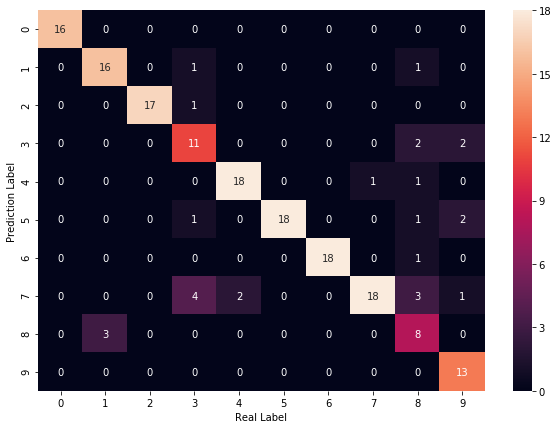

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:69 index:[5] real:5
#1 min_error:74 index:[2] real:2
#2 min_error:80 index:[7] real:8
#3 min_error:20 index:[0] real:0
#4 min_error:57 index:[1] real:1
#5 min_error:44 index:[7] real:7
#6 min_error:32 index:[6] real:6
#7 min_error:61 index:[3] real:3
#8 min_error:34 index:[2] real:2
#9 min_error:64 index:[1] real:1
#10 min_error:69 index:[7] real:7
#11 min_error:71 index:[7] real:4
#12 min_error:44 index:[6] real:6
#13 min_error:53 index:[3] real:3
#14 min_error:62 index:[1] real:1
#15 min_error:72 index:[3] real:3
#16 min_error:68 index:[7] real:9
#17 min_error:55 index:[1] real:1
#18 min_error:52 index:[7] real:7
#19 min_error:26 index:[6] real:6
#20 min_error:73 index:[8] real:8
#21 min_error:43 index:[4] real:4
#22 min_error:56 index:[3] real:3
#23 min_error:67 index:[1] real:1
#24 min_error:42 index:[4] real:4
#25 min_error:26 index:[0] real:0
#26 min_error:49 index:[5] real:5
#27 min_error:51 index:[3] real:3
#28 min_error:63 index:[6] real:6
#29 min_error:72 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8862090290661719
Avg Base Learner:0.7851280148423007


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.07777777777777778
Accuracy on training set: 0.16666666666666666
Accuracy on training set: 0.25555555555555554
Accuracy on training set: 0.2388888888888889
Accuracy on training set: 0.3
Accuracy on training set: 0.4388888888888889
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5
Accuracy on training set: 0.5
Accuracy on training set: 0.5277777777777778
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6333333333333333
Accuracy on training

Accuracy on training set: 0.8444444444444444
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8277777777777777
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.8444444444444444
Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8444444444444444
Accuracy o

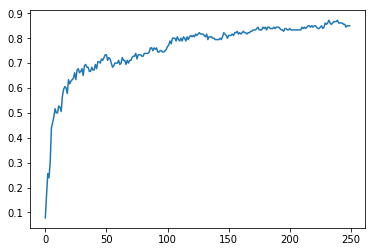

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4273 Total connections::4320
